## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

### Prepare
Check environment. Install packages if in Colab.


In [1]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.4.5  # 0.3.2 does not work in Colab
    !rm -rf ./mae
    !git clone https://github.com/JerryX1110/mae.git
    sys.path.append('./mae')
else:
    sys.path.append('..')
import models_mae

Running in Colab.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 3.4 MB/s eta 0:00:00
Cloning into 'mae'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 108 (delta 39), reused 0 (delta 0), pack-reused 39
Receiving objects: 100% (108/108), 4.37 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [45]:
net = torch.load("/content/mae_visualize_vit_large.pth",map_location=torch.device('cpu'))


In [50]:
#@title Default title text
print(net['model'].keys())

odict_keys(['cls_token', 'pos_embed', 'mask_token', 'decoder_pos_embed', 'patch_embed.proj.weight', 'patch_embed.proj.bias', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.qkv.bias', 'blocks.0.attn.proj.weight', 'blocks.0.attn.proj.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.mlp.fc1.weight', 'blocks.0.mlp.fc1.bias', 'blocks.0.mlp.fc2.weight', 'blocks.0.mlp.fc2.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight', 'blocks.1.attn.qkv.bias', 'blocks.1.attn.proj.weight', 'blocks.1.attn.proj.bias', 'blocks.1.norm2.weight', 'blocks.1.norm2.bias', 'blocks.1.mlp.fc1.weight', 'blocks.1.mlp.fc1.bias', 'blocks.1.mlp.fc2.weight', 'blocks.1.mlp.fc2.bias', 'blocks.2.norm1.weight', 'blocks.2.norm1.bias', 'blocks.2.attn.qkv.weight', 'blocks.2.attn.qkv.bias', 'blocks.2.attn.proj.weight', 'blocks.2.attn.proj.bias', 'blocks.2.norm2.weight', 'blocks.2.norm2.bias', 'blocks.2.mlp.fc1.weight', 'blocks.2.mlp.fc1.bias

In [54]:
net['model']['blocks.2.attn.qkv.weight']

tensor([[ 0.0253,  0.0041, -0.0006,  ..., -0.0613, -0.0147,  0.0607],
        [-0.0027, -0.0047, -0.0004,  ...,  0.0293,  0.0388, -0.0147],
        [ 0.0005, -0.0024, -0.0003,  ...,  0.0497,  0.0260,  0.0065],
        ...,
        [-0.0123, -0.0119, -0.0093,  ..., -0.0030, -0.0443, -0.0626],
        [-0.0150,  0.0005,  0.0085,  ...,  0.0345,  0.0285, -0.0145],
        [ 0.0177,  0.0193,  0.0050,  ..., -0.0312, -0.0042, -0.1147]])

In [53]:
import numpy as np
model_ckpt = np.load("ckpt.zip")

BadZipFile: ignored

MAE with pixel reconstruction:
go on run MAE
masking_strategy random
mask L 196


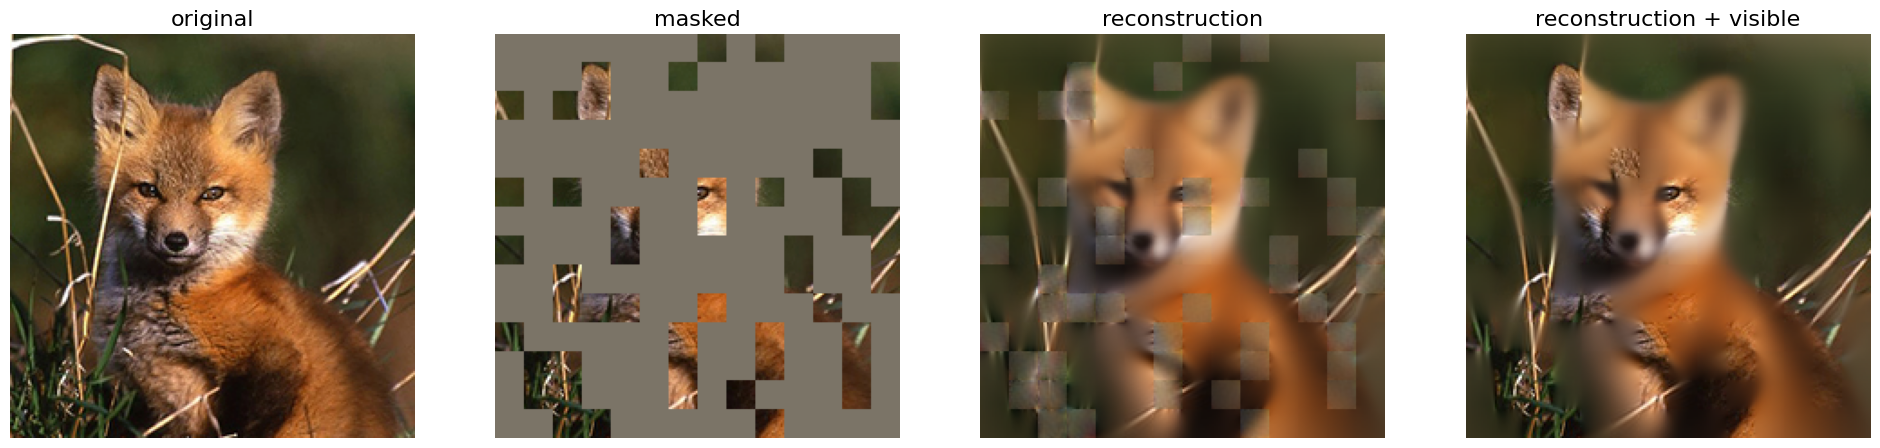

In [7]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
#run_one_image(img, model_mae, mask_ratio=1, masking_strategy='center')
#run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='random')
#run_one_image(img, model_mae, mask_ratio=0.75, masking_strategy='random')

run_one_image(img, model_mae, mask_ratio=0.75, masking_strategy='random')

MAE with pixel reconstruction:
go on run MAE
masking_strategy center


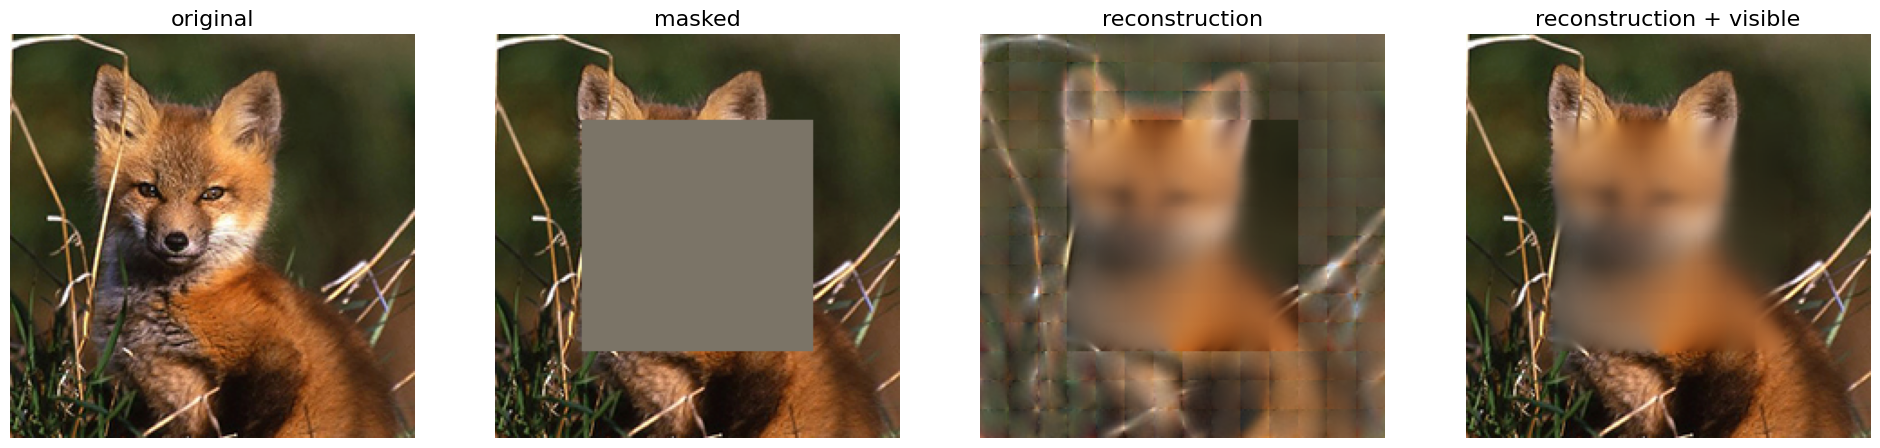

In [5]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
#run_one_image(img, model_mae, mask_ratio=1, masking_strategy='center')
#run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='random')
#run_one_image(img, model_mae, mask_ratio=0.75, masking_strategy='random')

run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='center')

masking_strategy downright


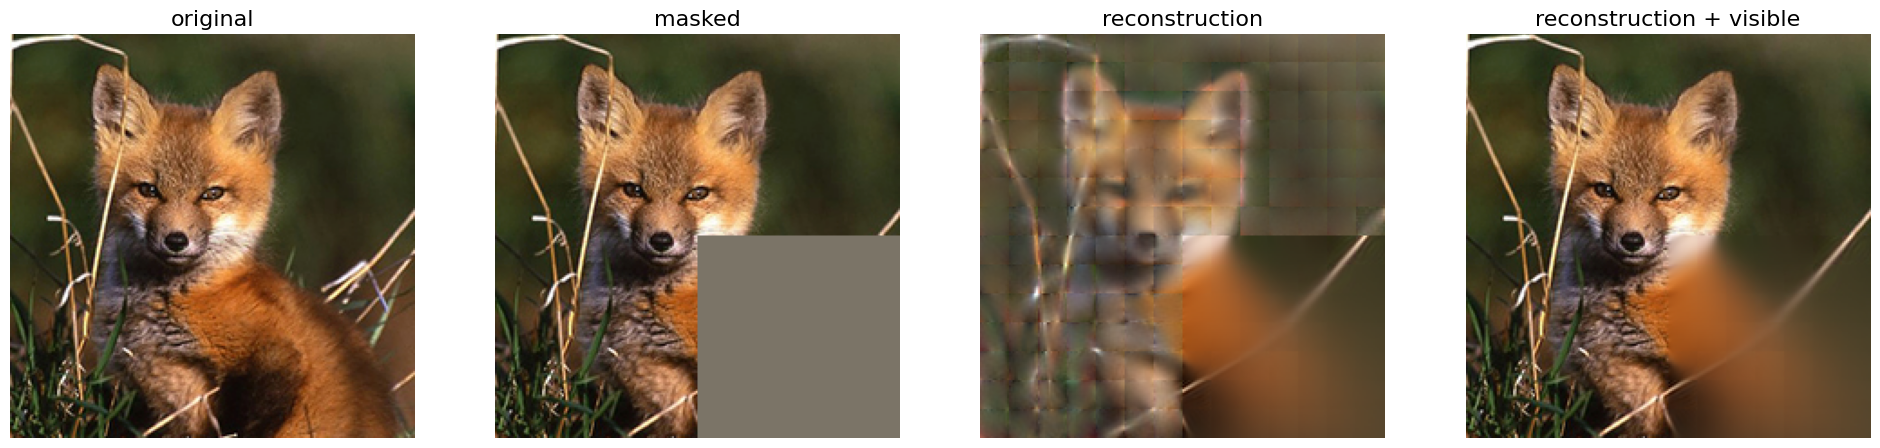

In [26]:
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

(224, 224, 3)
masking_strategy downright


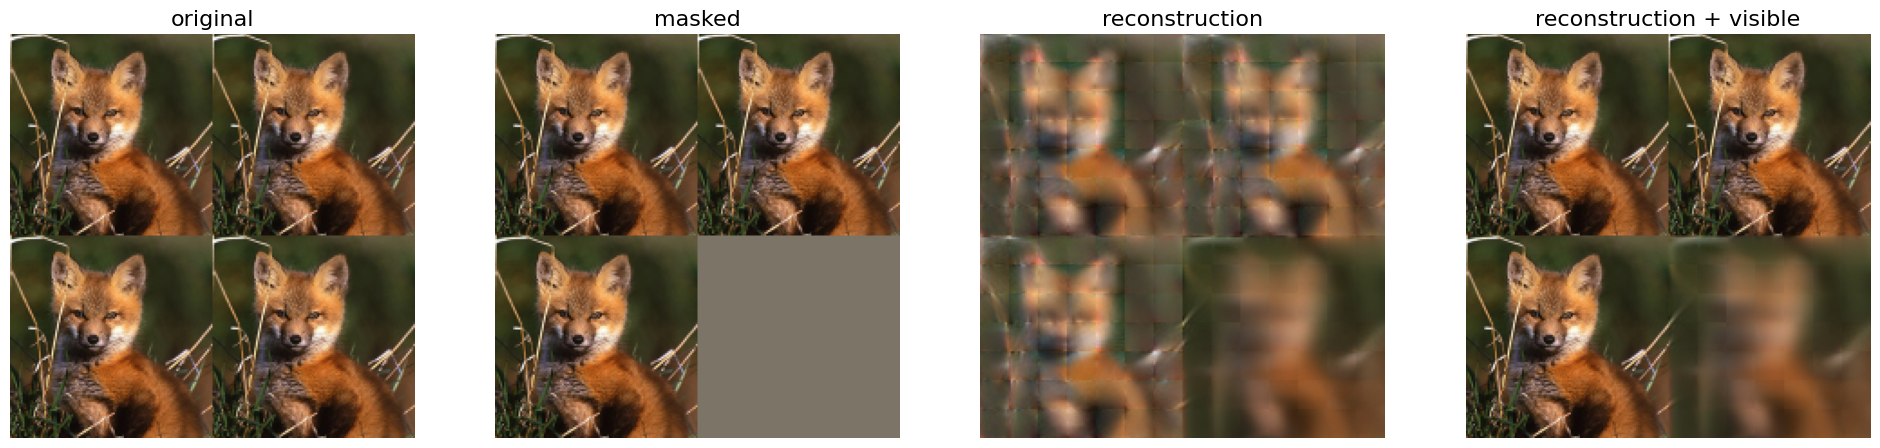

In [32]:
img_large = duplicate_image(img)
print(img_large.shape)
run_one_image(img_large, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


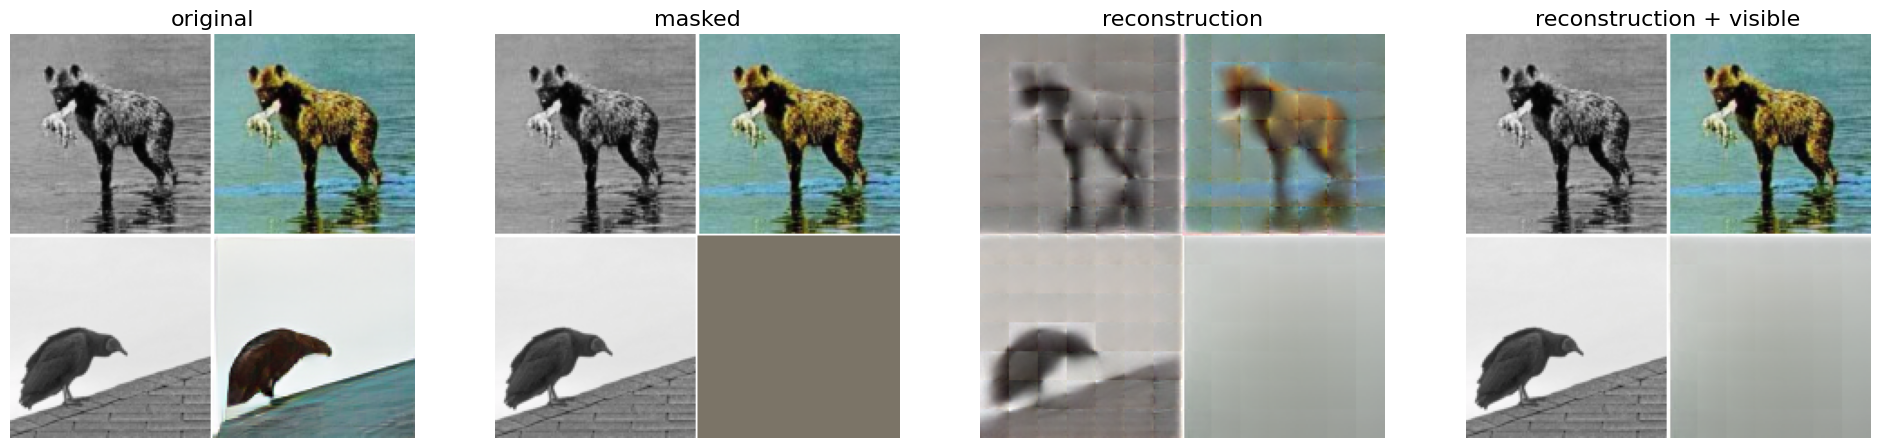

In [35]:
img = load_image("1177.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


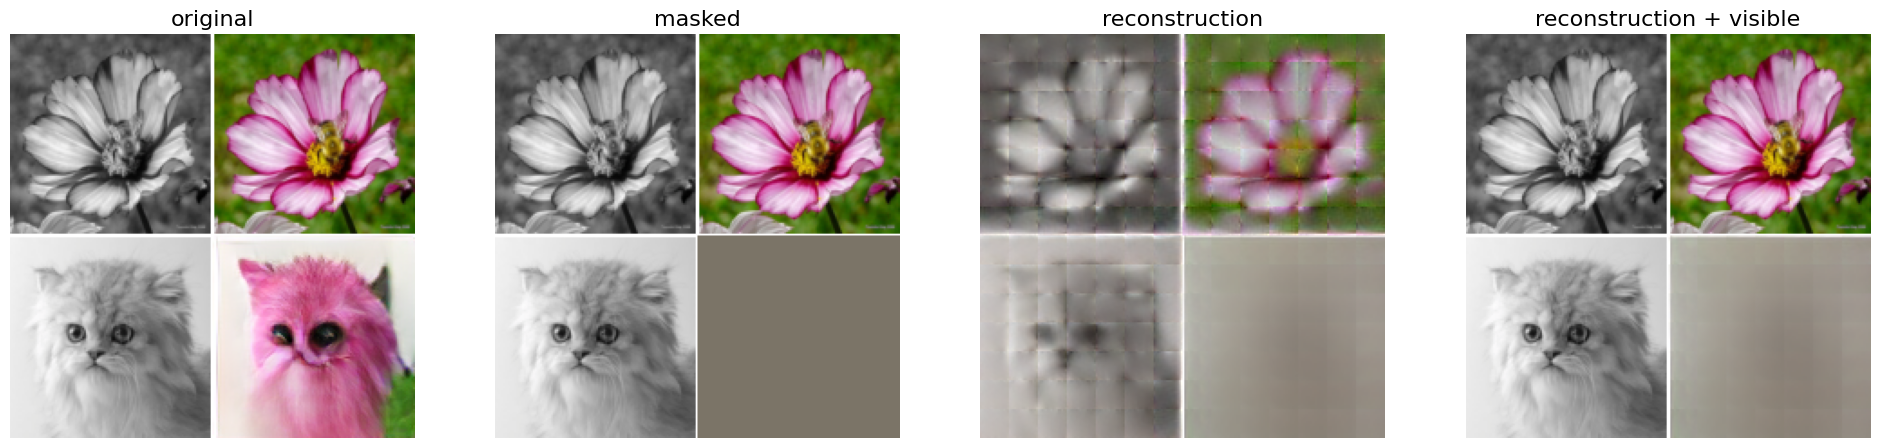

In [36]:
img = load_image("14193.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


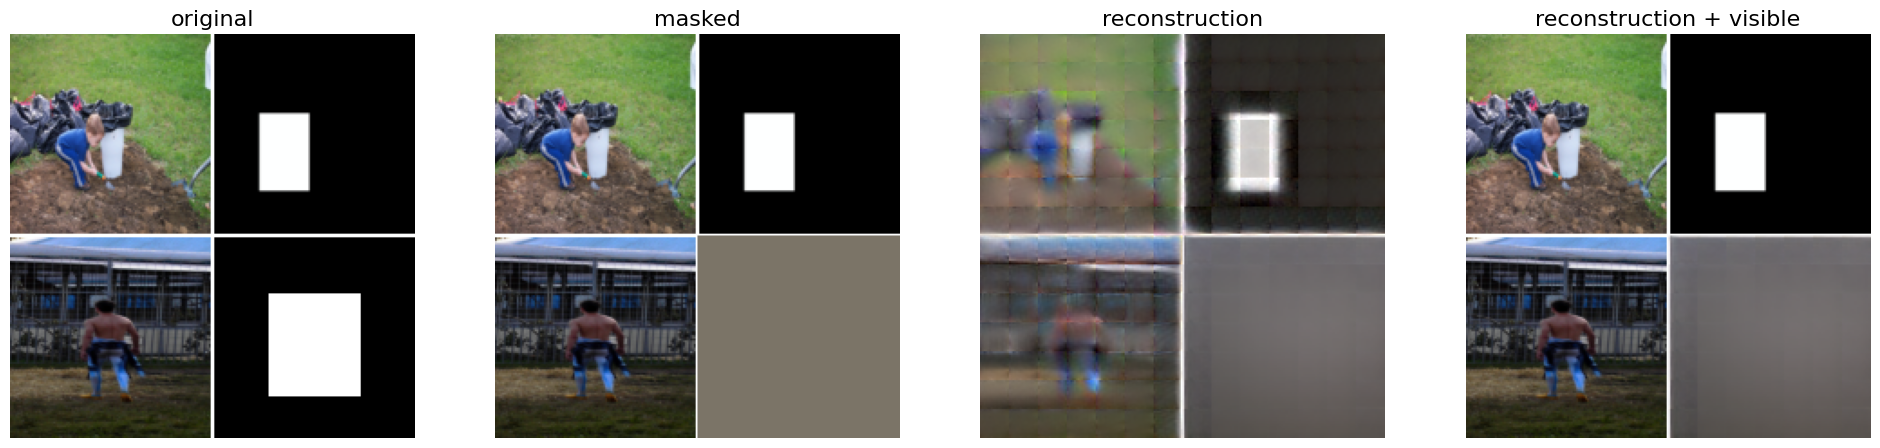

In [37]:
img = load_image("27.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


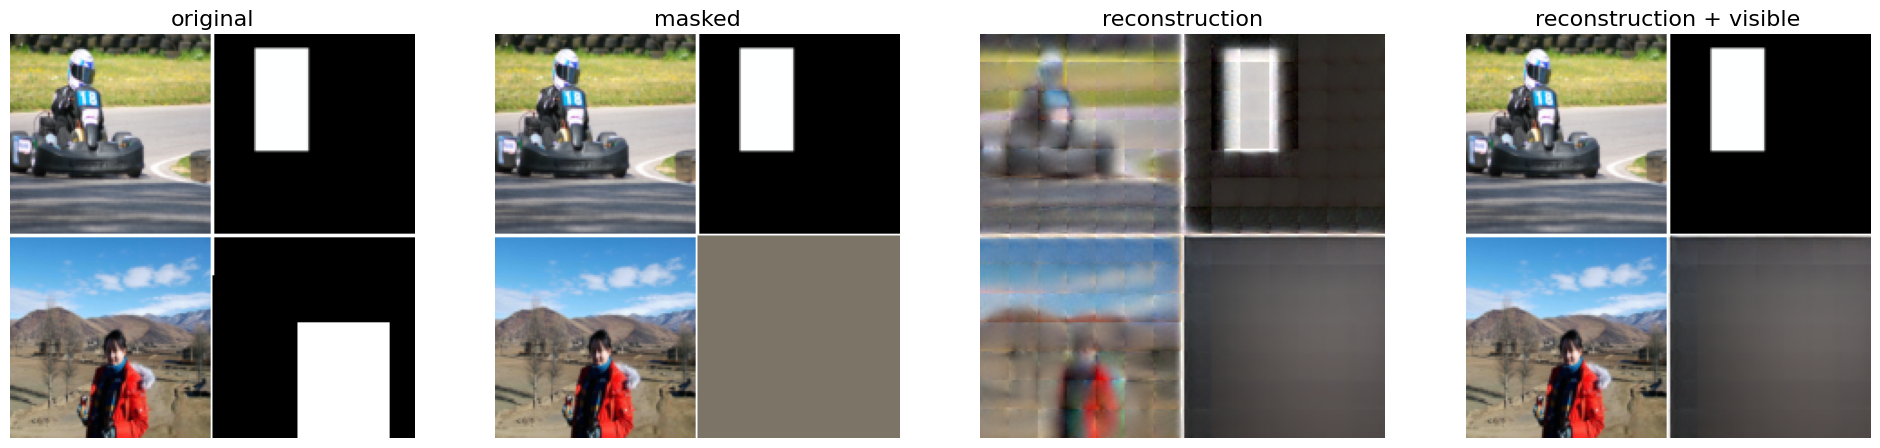

In [38]:
img = load_image("54.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


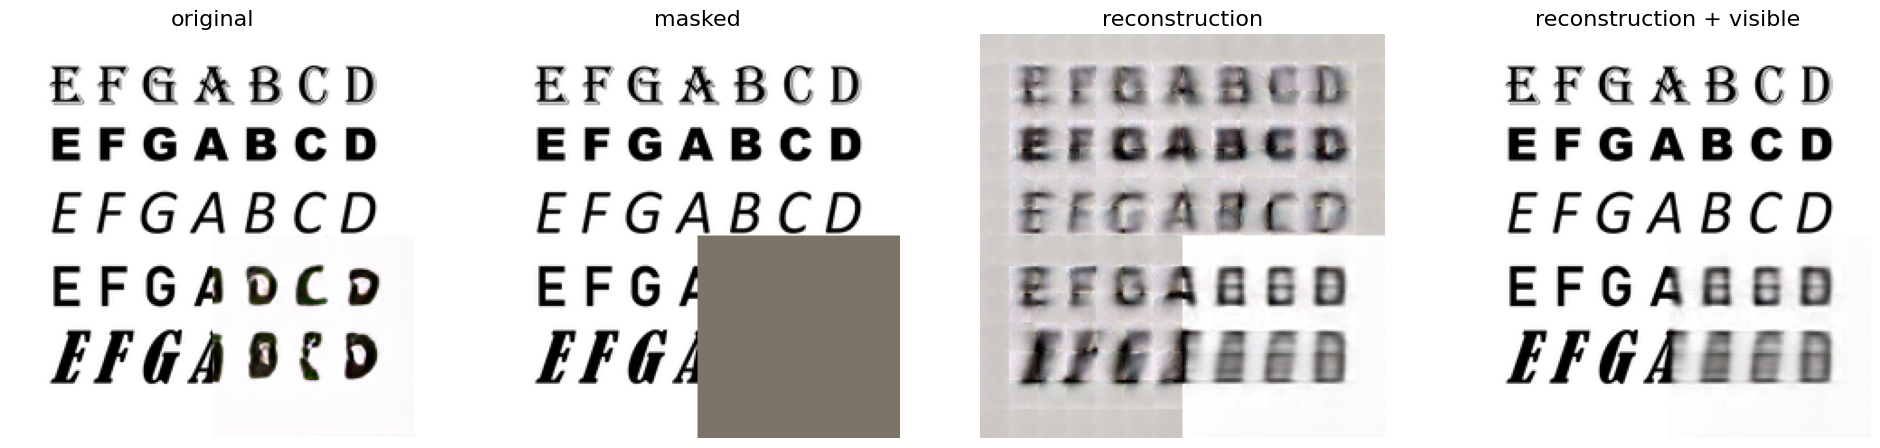

In [39]:
img = load_image("text4.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


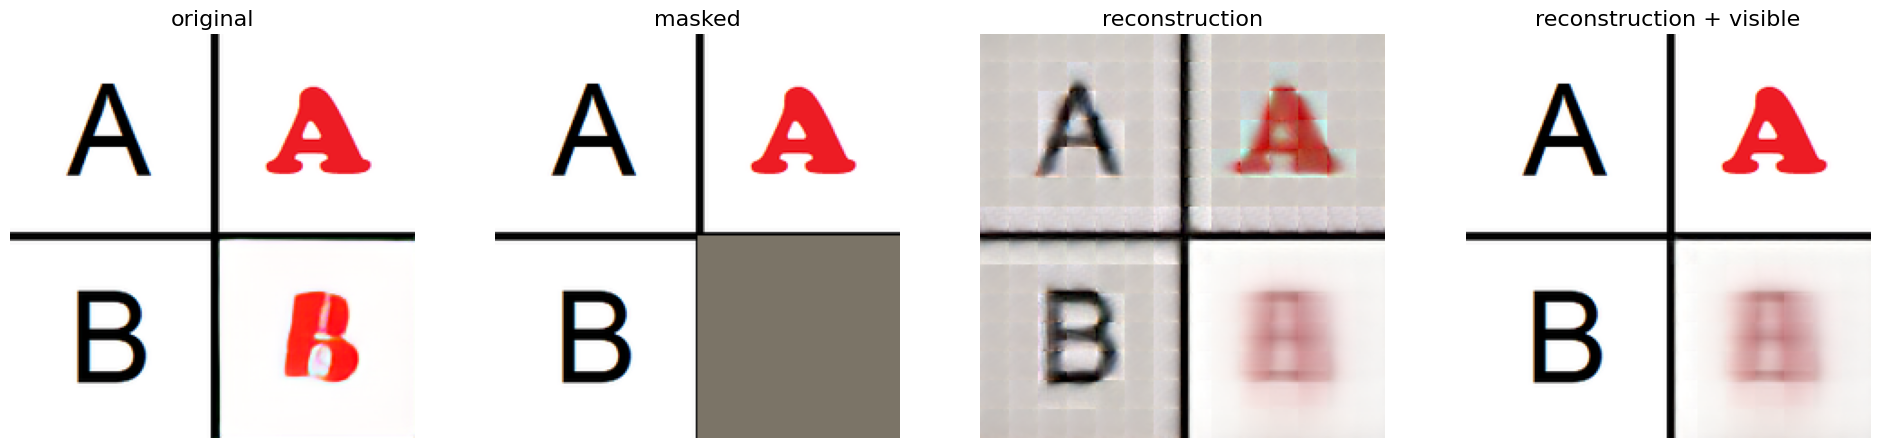

In [43]:
img = load_image("kan.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


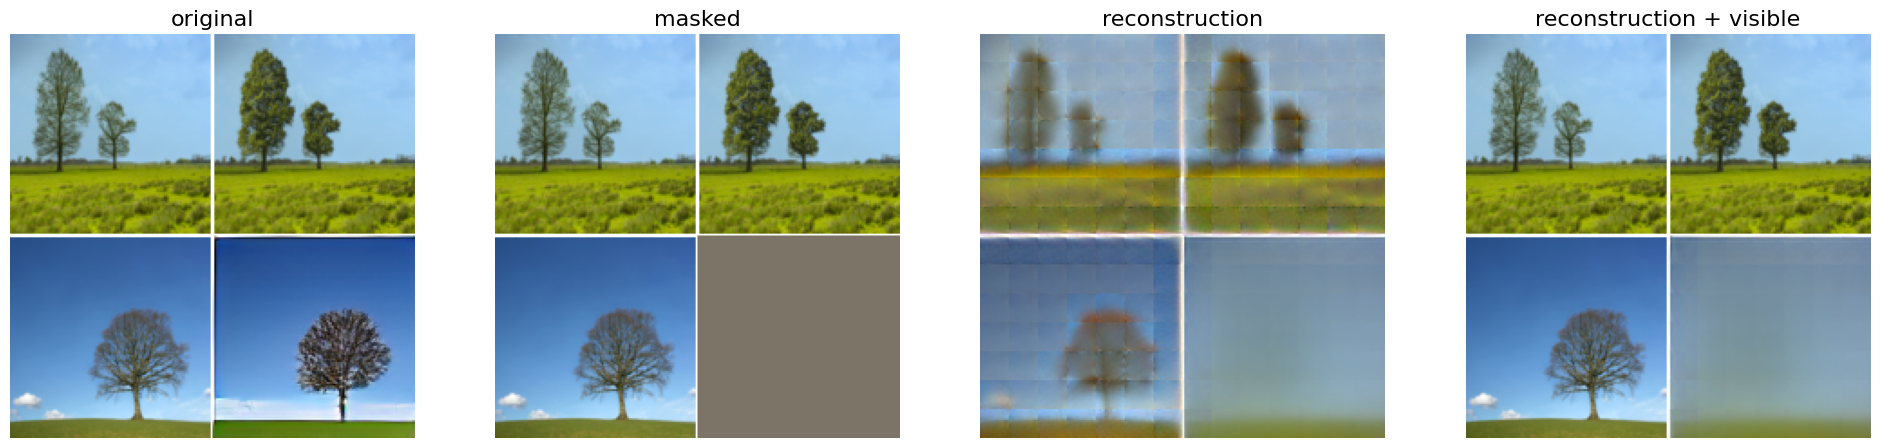

In [44]:
img = load_image("tree.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


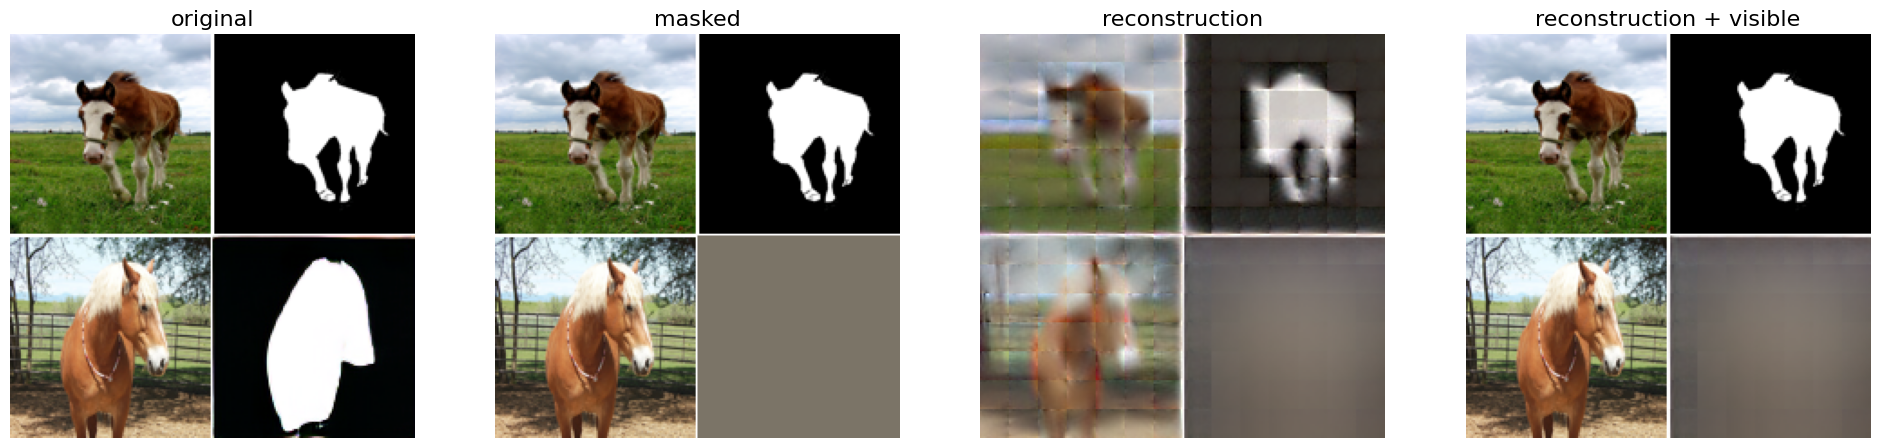

In [41]:
img = load_image("/content/2_590_MAEVQGAN.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

masking_strategy downright


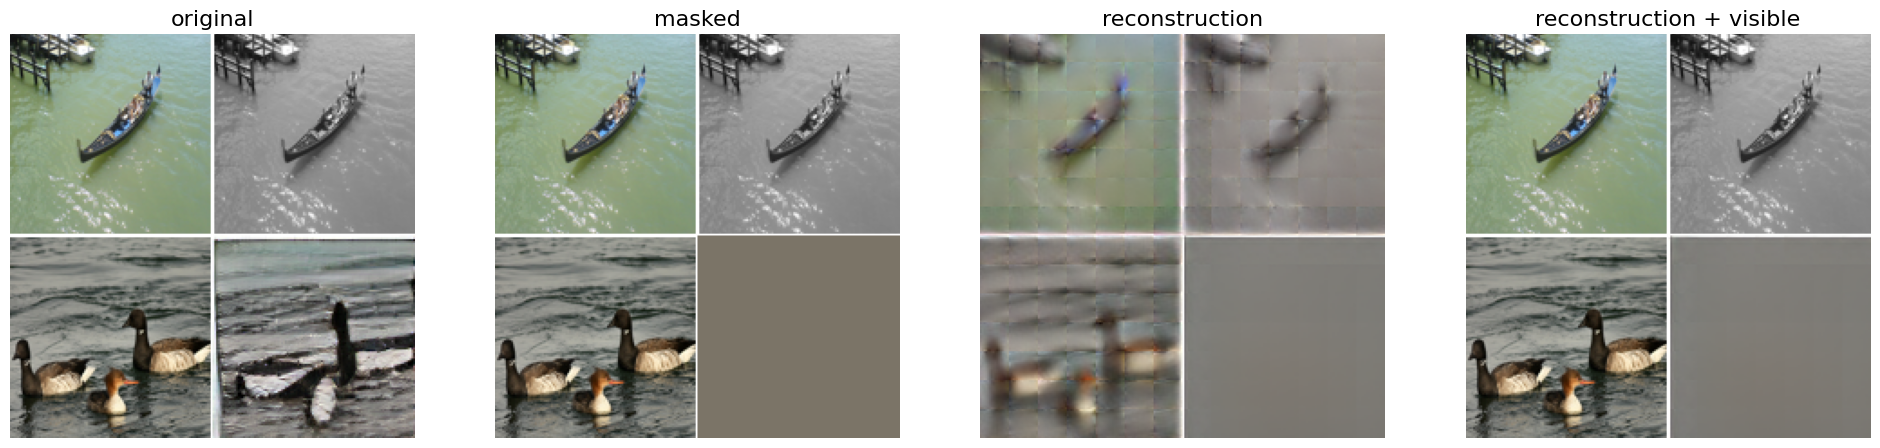

In [42]:
img = load_image("dec_4.png")
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='downright')

### Define utils

In [34]:
# define the utils
import cv2

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def load_image(img_filename):
  img = Image.open(img_filename)
  img = img.resize((224, 224))
  img = np.array(img) / 255.

  assert img.shape == (224, 224, 3)

  # normalize by ImageNet mean and std
  img = img - imagenet_mean
  img = img / imagenet_std
  return img

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def duplicate_image(img):
    img_h2 = np.hstack([img,img])
    img_v2 = np.vstack([img_h2,img_h2])
    img_v2 = cv2.resize(img_v2, (224, 224))
    return img_v2

def run_one_image(img, model, mask_ratio=0.75, masking_strategy='random'):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=mask_ratio, masking_strategy=masking_strategy)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

In [18]:
print(img_v2.shape)

(224, 224)


In [19]:
assert img.shape == (224, 224, 3)

### Load an image

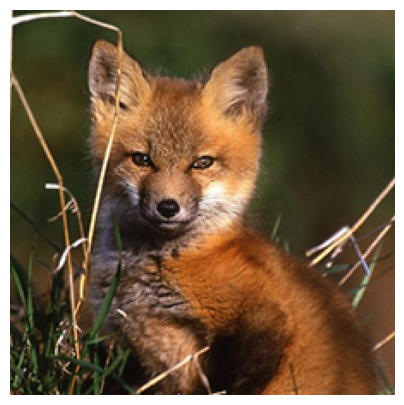

In [16]:
# load an image
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img = Image.open(requests.get(img_url, stream=True).raw)
img = img.resize((224, 224))
img = np.array(img) / 255.

assert img.shape == (224, 224, 3)

# normalize by ImageNet mean and std
img = img - imagenet_mean
img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

### Load a pre-trained MAE model

In [4]:
# This is an MAE model trained with pixels as targets for visualization (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large.pth

chkpt_dir = 'mae_visualize_vit_large.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')


--2023-04-23 12:39:53--  https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.125.71, 52.84.125.87, 52.84.125.65, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.125.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318315181 (1.2G) [binary/octet-stream]
Saving to: ‘mae_visualize_vit_large.pth’

mae_visualize_vit_l 100%[===================>]   1.23G   170MB/s    in 7.3s    

2023-04-23 12:40:00 (172 MB/s) - ‘mae_visualize_vit_large.pth’ saved [1318315181/1318315181]

<All keys matched successfully>
Model loaded.


In [ ]:
def gen_center_mask(emb_shape=(4,4), mask_ratio=0.5):
  mask = np.linspace(1,1,emb_shape[0]*emb_shape[1]).reshape(emb_shape)
  quarter_num_x = int(emb_shape[0]*mask_ratio/2)
  quarter_num_y = int(emb_shape[1]*mask_ratio/2)
  mask[0:quarter_num_x,:]=0
  mask[emb_shape[0]-quarter_num_x:,:]=0
  mask[:, 0:quarter_num_x]=0
  mask[:, emb_shape[1]-quarter_num_x:]=0
  """ mask
  [[0. 0. 0. 0.]
  [0. 1. 1. 0.]
  [0. 1. 1. 0.]
  [0. 0. 0. 0.]]
  """
  mask = mask.flatten()
  ids = np.argsort(mask)
  mask_pix_num = int((1-mask).sum())
  ids_keep = ids[:mask_pix_num]
  return ids, mask, ids_keep

ids, mask, ids_keep = gen_center_mask()
print(ids_keep)

print(mask)
print(ids)

[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[ 0  1  2  3  4  7  8 11 12 13 14 15]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[ 0  1  2  3  4  7  8 11 12 13 14 15  5  6  9 10]


In [ ]:
def gen_top_down_mask(emb_shape=(4,4), mask_ratio=0.5):
  mask = np.linspace(1,1,emb_shape[0]*emb_shape[1]).reshape(emb_shape)
  quarter_num_x = int(emb_shape[0]*mask_ratio)
  quarter_num_y = int(emb_shape[1]*mask_ratio)
  mask[0:quarter_num_x,:]=0
  #mask[emb_shape[0]-quarter_num_x:,:]=0
  mask[:, 0:quarter_num_x]=0
  #mask[:, emb_shape[1]-quarter_num_x:]=0
  """ mask
  [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]
  """
  mask = mask.flatten()
  ids = np.argsort(mask)
  mask_pix_num = int((1-mask).sum())
  ids_keep = ids[:mask_pix_num]
  return ids, mask, ids_keep

ids, mask, ids_keep = gen_top_down_mask()
print(ids_keep)

print(mask)
print(ids)

mask [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[ 0  1  2  3  4  5  6  7  8  9 12 13]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
[ 0  1  2  3  4  5  6  7  8  9 12 13 10 11 14 15]


In [ ]:
 def center_masking(x, mask_ratio):
    """
    Perform per-sample random masking by per-sample shuffling.
    Per-sample shuffling is done by argsort random noise.
    x: [N, L, D], sequence
    """
    N, L, D = x.shape  # batch, length, dim
    patch_size = np.int(np.sqrt(L))
    ids, mask, ids_keep = gen_center_mask((patch_size,patch_size), mask_ratio)
    ids_shuffle = torch.tensor(ids).unsqueeze(0).repeat(N,1)         
    ids_restore = torch.argsort(ids_shuffle, dim=1) #ids_shuffle
    
    mask = torch.tensor(mask).unsqueeze(0).repeat(N,1).to(x.device)

    x_masked = torch.gather(x, dim=1, index=torch.tensor(ids_keep).unsqueeze(-1).repeat(1, 1, D))
    # generate the binary mask: 0 is keep, 1 is remove  
    mask = torch.ones([N, L], device=x.device)
    mask[:, :len(ids_keep)] = 0
    mask = torch.gather(mask, dim=1, index=ids_restore)
    return x_masked, mask, ids_restore

 def top_down_masking(x, mask_ratio):
    """
    Perform per-sample random masking by per-sample shuffling.
    Per-sample shuffling is done by argsort random noise.
    x: [N, L, D], sequence
    """
    N, L, D = x.shape  # batch, length, dim
    patch_size = np.int(np.sqrt(L))
    ids, mask, ids_keep = gen_top_down_mask((patch_size,patch_size), mask_ratio)
    ids_shuffle = torch.tensor(ids).unsqueeze(0).repeat(N,1)         
    ids_restore = torch.argsort(ids_shuffle, dim=1) #ids_shuffle
    
    mask = torch.tensor(mask).unsqueeze(0).repeat(N,1).to(x.device)

    x_masked = torch.gather(x, dim=1, index=torch.tensor(ids_keep).unsqueeze(-1).repeat(1, 1, D))
    # generate the binary mask: 0 is keep, 1 is remove  
    mask = torch.ones([N, L], device=x.device)
    mask[:, :len(ids_keep)] = 0
    mask = torch.gather(mask, dim=1, index=ids_restore)
    return x_masked, mask, ids_restore



 def fix_masking(x, mask_ratio):
    """
    Perform per-sample random masking by per-sample shuffling.
    Per-sample shuffling is done by argsort random noise.
    x: [N, L, D], sequence
    """
    N, L, D = x.shape  # batch, length, dim
    print("mask L", L)
    len_keep = int(L * (1 - mask_ratio))

    patch_size = np.int(np.sqrt(L))
    print(patch_size)
    
    noise = torch.rand(N, L, device=x.device)  # noise in [0, 1]
    print("noise",noise.size())
    # sort noise for each sample
    ids_shuffle = (torch.tensor(np.int64(np.linspace(0,L-1,L))).unsqueeze(0).repeat(N,1))           #torch.argsort(noise, dim=1)  # ascend: small is keep, large is remove
    ids_restore = ids_shuffle #torch.argsort(ids_shuffle, dim=1)
    print(ids_shuffle.size())
    print(ids_shuffle)

    # keep the first subset
    ids_keep = ids_shuffle[:, :len_keep]
    x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

    # generate the binary mask: 0 is keep, 1 is remove
    mask = torch.ones([N, L], device=x.device)
    mask[:, :len_keep] = 0
    # unshuffle to get the binary mask
    mask = torch.gather(mask, dim=1, index=ids_restore)

    return x_masked, mask, ids_restore

 def random_masking(x, mask_ratio):
    """
    Perform per-sample random masking by per-sample shuffling.
    Per-sample shuffling is done by argsort random noise.
    x: [N, L, D], sequence
    """
    N, L, D = x.shape  # batch, length, dim
    
    noise = torch.rand(N, L, device=x.device)  # noise in [0, 1]
    print("noise",noise)
    len_keep = int(L * (1 - mask_ratio))
    
    # sort noise for each sample
    ids_shuffle = torch.argsort(noise, dim=1)  # ascend: small is keep, large is remove
    print("ids_shuffle",ids_shuffle)
    ids_restore = torch.argsort(ids_shuffle, dim=1)
    print("ids_restore",ids_restore)
    # keep the first subset
    ids_keep = ids_shuffle[:, :len_keep]
    print("ids_keep",ids_keep)
    x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

    # generate the binary mask: 0 is keep, 1 is remove
    mask = torch.ones([N, L], device=x.device)
    mask[:, :len_keep] = 0
    # unshuffle to get the binary mask
    mask = torch.gather(mask, dim=1, index=ids_restore)

    return x_masked, mask, ids_restore

def random_masking2(x, mask_ratio):
    """
    Perform per-sample random masking by per-sample shuffling.
    Per-sample shuffling is done by argsort random noise.
    x: [N, L, D], sequence
    """
    N, L, D = x.shape  # batch, length, dim
    
    noise = torch.rand(N, L, device=x.device)  # noise in [0, 1]
    len_keep = int(L * (1 - mask_ratio))
    
    # sort noise for each sample
    ids_shuffle = (torch.tensor(np.int64(np.linspace(0,L-1,L))).unsqueeze(0).repeat(N,1))           #torch.argsort(noise, dim=1)  # ascend: small is keep, large is remove
    ids_restore = ids_shuffle 

    # keep the first subset
    ids_keep = ids_shuffle[:, :len_keep]
    x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

    # generate the binary mask: 0 is keep, 1 is remove
    mask = torch.ones([N, L], device=x.device)
    mask[:, :len_keep] = 0
    # unshuffle to get the binary mask
    mask = torch.gather(mask, dim=1, index=ids_restore)

    return x_masked, mask, ids_restore


In [ ]:
mask = np.linspace(0,1*16*1 - 1,1*16*1).reshape((1,16,1))
mask_ts = torch.tensor(mask)
print("mask_ts.size()",mask_ts.size())

x_masked, mask, ids_restore = center_masking(mask_ts, 0.75)

print("######output")
print(x_masked)
print(mask)
print(ids_restore)


mask_ts.size() torch.Size([1, 16, 1])
######output
tensor([[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 7.],
         [ 8.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.]]], dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.]])
tensor([[ 0,  1,  2,  3,  4, 12, 13,  5,  6, 14, 15,  7,  8,  9, 10, 11]])


<ipython-input-13-5a553c866c03>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  patch_size = np.int(np.sqrt(L))


In [ ]:
mask = np.linspace(0,1*16*1 - 1,1*16*1).reshape((1,16,1))
mask_ts = torch.tensor(mask)
print("mask_ts.size()",mask_ts.size())

x_masked, mask, ids_restore = center_masking(mask_ts, 0.75)

print("######output")
print(x_masked)
print(mask)
print(ids_restore)


mask_ts.size() torch.Size([1, 16, 1])
######output
tensor([[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 7.],
         [ 8.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.]]], dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.]])
tensor([[ 0,  1,  2,  3,  4, 12, 13,  5,  6, 14, 15,  7,  8,  9, 10, 11]])


<ipython-input-9-bf1f22067cff>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  patch_size = np.int(np.sqrt(L))


In [ ]:
mask = np.linspace(1,1*16*1,1*16*1).reshape((1,16,1))
mask_ts = torch.tensor(mask)
print("mask_ts.size()",mask_ts.size())

x_masked, mask, ids_restore = random_masking(mask_ts, 0.75)

print("######output")
print(x_masked)
print(mask)
print(ids_restore)


mask_ts.size() torch.Size([1, 16, 1])
noise tensor([[0.7116, 0.2050, 0.3078, 0.9809, 0.0103, 0.4660, 0.4604, 0.8547, 0.4525,
         0.6317, 0.4760, 0.2200, 0.2166, 0.2571, 0.0458, 0.1755]])
ids_shuffle tensor([[ 4, 14, 15,  1, 12, 11, 13,  2,  8,  6,  5, 10,  9,  0,  7,  3]])
ids_restore tensor([[13,  3,  7, 15,  0, 10,  9, 14,  8, 12, 11,  5,  4,  6,  1,  2]])
ids_keep tensor([[ 4, 14, 15,  1]])
######output
tensor([[[ 5.],
         [15.],
         [16.],
         [ 2.]]], dtype=torch.float64)
tensor([[1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.]])
tensor([[13,  3,  7, 15,  0, 10,  9, 14,  8, 12, 11,  5,  4,  6,  1,  2]])


In [ ]:
mask = np.linspace(1,1*16*4,1*16*4).reshape((1,16,4))
mask_ts = torch.tensor(mask)
print("mask_ts.size()",mask_ts.size())

x_masked, mask, ids_restore = random_masking(mask_ts, 0.75)
print(x_masked)
print(mask)
print(ids_restore)

mask_ts.size() torch.Size([1, 16, 4])
tensor([[[37., 38., 39., 40.],
         [29., 30., 31., 32.],
         [ 5.,  6.,  7.,  8.],
         [49., 50., 51., 52.]]], dtype=torch.float64)
tensor([[1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.]])
tensor([[10,  2, 12,  5, 14, 11,  4,  1,  9,  0,  8,  6,  3, 15,  7, 13]])


### Run MAE on the image

MAE with pixel reconstruction:
go on run MAE
mask L 196


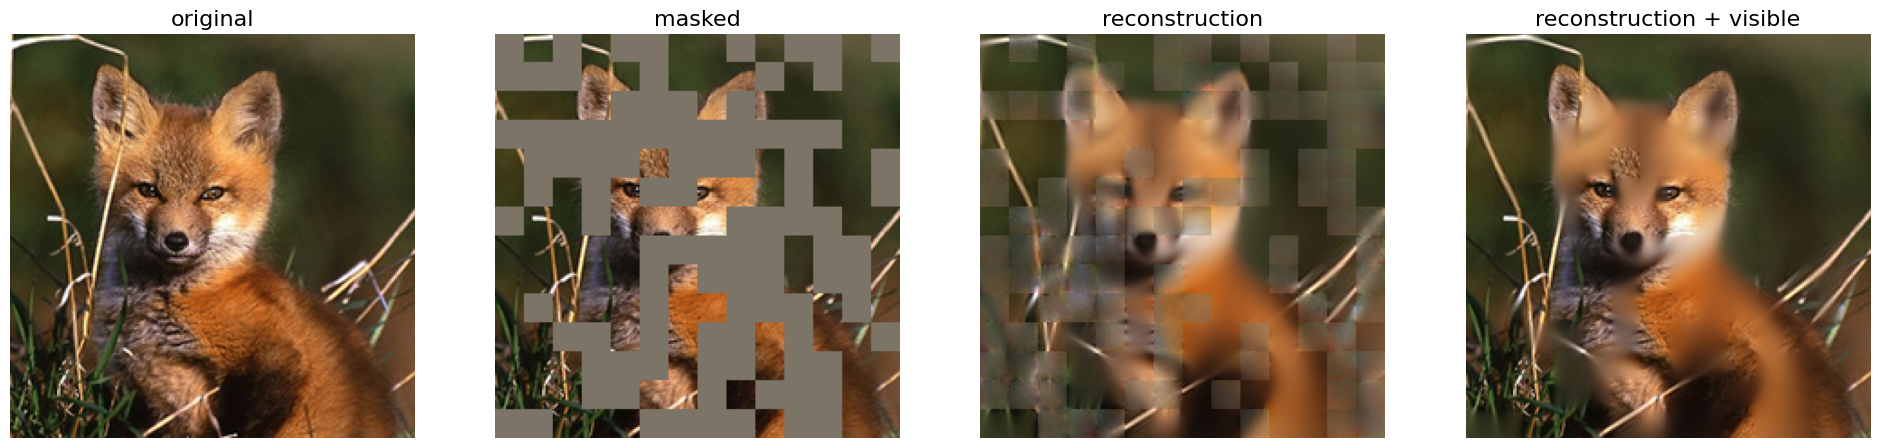

In [ ]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(img, model_mae, mask_ratio=0.5, masking_strategy='center')

### Load another pre-trained MAE model

In [ ]:
# This is an MAE model trained with an extra GAN loss for more realistic generation (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large_ganloss.pth

chkpt_dir = 'mae_visualize_vit_large_ganloss.pth'
model_mae_gan = prepare_model('mae_visualize_vit_large_ganloss.pth', 'mae_vit_large_patch16')
print('Model loaded.')

File ‘mae_visualize_vit_large_ganloss.pth’ already there; not retrieving.

<All keys matched successfully>
Model loaded.


### Run MAE on the image

MAE with extra GAN loss:


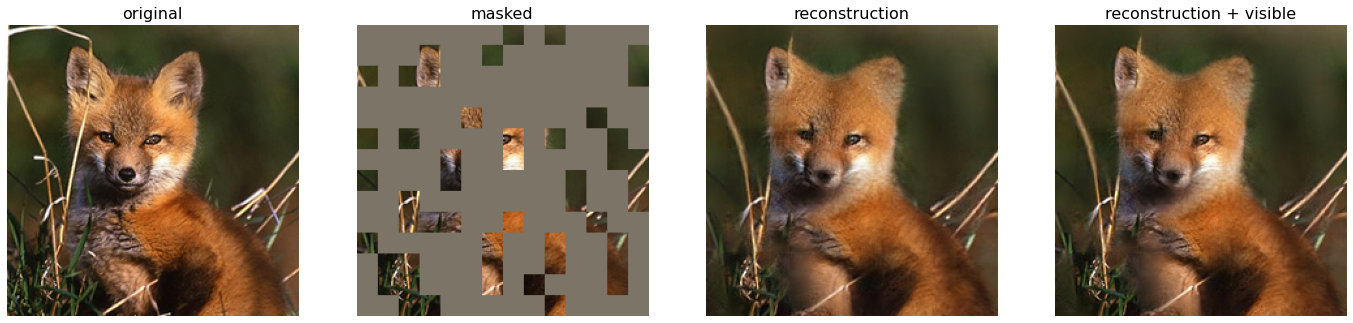

In [ ]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with extra GAN loss:')
run_one_image(img, model_mae_gan)